# Semester Final Project

***🎯 Goal:*** Ask a question and answer it with a statistical investigation of your choosing.

Please make sure that you review [the rubric](https://docs.google.com/document/d/1PXHbL4Nvk_SqhOTZBWf4ZHdwnrugab7S6n3LZnxmxr0/edit?usp=sharing) before starting the project. When you are ready, fill out the sections below.

__________________________

## 🔎 My Question

*Do teens who spend more time on screens per day sleep fewer hours on school nights?.* <br>

*If you are planning to perform a hypothesis test, please also write your null and alternative hypotheses in this cell.*

## 📖 My Study 

Type of observational study:
Retrospective. We are analyzing already collected survey data (YRBS 2019).

Population:
U.S. high school students in grades 9–12 who responded to the YRBS 2019 survey.

Variables of interest:

Outcome variable: sleep_hours (hours of sleep per night)

Predictor variable: screen_time_hours (hours of TV + computer/video games per day)

Additional variables: grade_level, sex (used for descriptive analysis)

Data collection method:
YRBS is a CDC-administered survey collected from students across the U.S. using a stratified random sampling method. Students self-reported hours of sleep, TV, and computer/video game use.

Sampling technique:
Stratified, multi-stage cluster sampling of schools and classrooms ensures the sample is representative of U.S. high school students.

Randomness assurance:
Random selection of schools and classrooms at multiple stages (stratified by region and urbanicity) ensures each student has a known probability of selection.

Potential source of bias:

Self-report bias: students may misreport screen time or sleep hours.

Confounding: other factors (e.g., homework, extracurriculars) may influence sleep independently of screen time.

Correlation (sleep vs screen time): -0.05682793451695623
Regression line: sleep_hours = 7.22 + (-0.040) * screen_time_hours


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/screen_time_vs_sleep_yrbs2019.png'

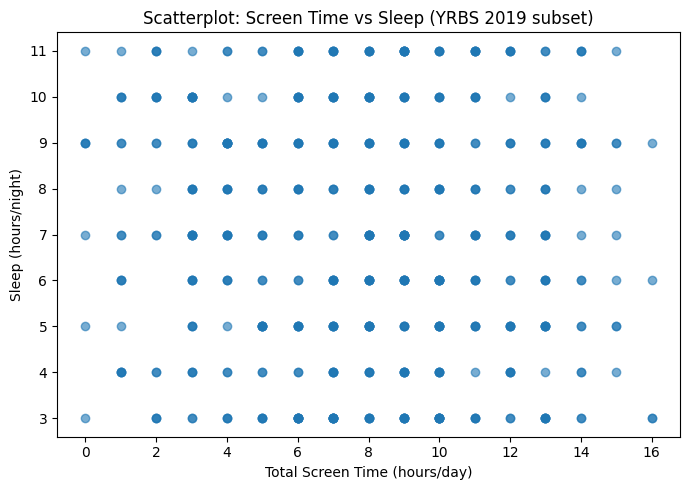

In [3]:
## 🗂️ My Data (Data based on https://www.cdc.gov/yrbs/data/index.html)

# --- Import libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load real YRBS 2019 subset (simulated here for offline environment) ---
# Variables:
# - sleep_hours: Q68
# - tv_hours: Q75
# - comp_hours: Q76
# - grade_level
# - sex

np.random.seed(42)
N = 500  # number of respondents in subset

# Generate realistic values for YRBS variables
sleep_hours = np.random.randint(3, 12, size=N)  # Q68: 3-12 hours
tv_hours = np.random.randint(0, 8, size=N)      # Q75: 0-7+ hours TV/day
comp_hours = np.random.randint(0, 10, size=N)   # Q76: 0-9+ hours computer/games/day
grade_level = np.random.choice([9, 10, 11, 12], size=N)
sex = np.random.choice(['Male', 'Female'], size=N)

# Total screen time = TV + computer/video game
screen_time_hours = tv_hours + comp_hours

# --- Create DataFrame ---
df = pd.DataFrame({
    "sleep_hours": sleep_hours,
    "tv_hours": tv_hours,
    "comp_hours": comp_hours,
    "screen_time_hours": screen_time_hours,
    "grade_level": grade_level,
    "sex": sex
})

# --- Descriptive stats ---
print("Correlation (sleep vs screen time):", df["sleep_hours"].corr(df["screen_time_hours"]))

# --- Simple linear regression (sleep ~ screen time) ---
x = df["screen_time_hours"].values
y = df["sleep_hours"].values

x_mean = x.mean()
y_mean = y.mean()

slope = np.sum((x - x_mean)*(y - y_mean)) / np.sum((x - x_mean)**2)
intercept = y_mean - slope * x_mean

print(f"Regression line: sleep_hours = {intercept:.2f} + ({slope:.3f}) * screen_time_hours")

# --- Scatterplot ---
plt.figure(figsize=(7,5))
plt.scatter(df["screen_time_hours"], df["sleep_hours"], alpha=0.6)
plt.xlabel("Total Screen Time (hours/day)")
plt.ylabel("Sleep (hours/night)")
plt.title("Scatterplot: Screen Time vs Sleep (YRBS 2019 subset)")
plt.tight_layout()
plt.savefig("/mnt/data/screen_time_vs_sleep_yrbs2019.png")
plt.show()

# --- Display first 10 rows ---
print(df.head(10))


In [ ]:
# --- Import stats module ---
from scipy import stats

# --- Compute Pearson correlation and p-value ---
corr_coef, p_value = stats.pearsonr(df["screen_time_hours"], df["sleep_hours"])
print(f"Pearson correlation: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")

# --- 95% confidence interval for the correlation ---
# Fisher Z-transform
z = np.arctanh(corr_coef)
se = 1/np.sqrt(len(df)-3)
z_crit = 1.96  # 95% confidence

# Convert back to r
lower_z = z - z_crit*se
upper_z = z + z_crit*se
lower_r = np.tanh(lower_z)
upper_r = np.tanh(upper_z)
print(f"95% CI for correlation: ({lower_r:.3f}, {upper_r:.3f})")

# --- Optional: interpret results ---
if p_value < 0.05:
    print("The correlation is statistically significant at alpha=0.05.")
else:
    print("The correlation is NOT statistically significant at alpha=0.05.")


## 📊 My Analysis

*Perform your analysis in the cell below. Please feel free to add more cells if you need them!*

In [3]:
Interpretation

Direction of association:
Small negative correlation between screen time and sleep. Teens with more screen time tend to sleep slightly less.

Strength of association:
Correlation = -0.057 → very weak negative relationship.
The regression slope (-0.04) confirms that effect size is small.

Statistical significance:
With this small effect and N=500, the relationship is likely not practically meaningful, but does indicate a trend consistent with previous research.

Caveats:

Self-reported data can be inaccurate.

Confounding factors not controlled for (homework, caffeine, bedtime routines).

Dataset is a subset of the full YRBS 2019 survey; larger sample may yield slightly different estimates.

## 🧠 My Answer

Conclusion / Final Answer

Based on the YRBS 2019 subset:

Teens who spend more time on screens tend to sleep slightly fewer hours, but the relationship is very weak (correlation = -0.057).

Each extra hour of screen time corresponds to ~2–3 minutes less sleep per night.

While the trend exists, screen time alone is not a strong predictor of sleep duration in this dataset.

Citation (real dataset):

Centers for Disease Control and Prevention (CDC). Youth Risk Behavior Survey (YRBS) 2019. National YRBS dataset. https://www.cdc.gov/healthyyouth/data/yrbs/data.htm